<a href="https://colab.research.google.com/github/Luiskar1/Luiskar1/blob/main/RegLog%C3%ADticaM%C3%BAltiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Librerías
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Data
df=pd.read_excel("/content/drive/MyDrive/Analíticas de Aprendizaje/DatasET_Diplomado.xlsx")

In [ ]:
#Dataframe
df.head()

,Hor_Est,Nota_Eval,Tip_Inst,Horario
0,1.0,0.5,Pub,N
1,1.0,1.0,Pub,N
2,1.5,0.8,Pub,N
3,1.5,0.7,Pub,N
4,1.5,0.3,Pub,N


In [ ]:
# Creación de un diccionario
#Cambiar los valores categóricos de las variables a numéricos
#=========================================
df.Tip_Inst=df.Tip_Inst.replace({'Pub':0, 'Pri':1, 'Mix':2})
df.head()

,Hor_Est,Nota_Eval,Tip_Inst,Horario
0,1.0,0.5,0.0,N
1,1.0,1.0,0.0,N
2,1.5,0.8,0.0,N
3,1.5,0.7,0.0,N
4,1.5,0.3,0.0,N


In [ ]:
df.Horario=df.Horario.replace({'N':0, 'D':1})
df.head()

,Hor_Est,Nota_Eval,Tip_Inst,Horario
0,1.0,0.5,0.0,0
1,1.0,1.0,0.0,0
2,1.5,0.8,0.0,0
3,1.5,0.7,0.0,0
4,1.5,0.3,0.0,0


In [ ]:
#Dimension del Dataset
print(df.shape)

(307, 4)


In [ ]:
# Conocer el tipo de variable
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Hor_Est    307 non-null    float64
 1   Nota_Eval  304 non-null    float64
 2   Tip_Inst   306 non-null    float64
 3   Horario    307 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 9.7 KB
None


In [ ]:
# Identificamos el número de missing values (datos nulos o perdidos de cada variable) en cada columna
df.isnull().sum()

Hor_Est      0
Nota_Eval    3
Tip_Inst     1
Horario      0
dtype: int64

In [ ]:
# Imputamos la variable Nota_Eval con la media
df['Nota_Eval'].fillna(df['Nota_Eval'].mean(), inplace=True)
print("valores perdidos en Nota_Eval: " + 
      str(df['Nota_Eval'].isnull().sum()))

# Imputamos la variable Tip_Inst con la moda
df['Tip_Inst'].fillna(df['Tip_Inst'].mode()[0], inplace=True)
print("Valores perdidos en Tip_Inst: " + 
      str(df['Tip_Inst'].isnull().sum()))

valores perdidos en Nota_Eval: 0
Valores perdidos en Tip_Inst: 0


In [ ]:
# Mostrar los datos imputados
df.isnull().sum()

Hor_Est      0
Nota_Eval    0
Tip_Inst     0
Horario      0
dtype: int64

In [ ]:
#Determinar las variables numéricas
VariablesNumericas=df._get_numeric_data().columns.to_list()
print(VariablesNumericas)
print(len(VariablesNumericas))

['Hor_Est', 'Nota_Eval', 'Tip_Inst', 'Horario']
4


In [ ]:
# Variables Categoricas
VariablesCategoricas=df.select_dtypes(include=["category"]).columns.to_list()
print(VariablesCategoricas)
print(len(VariablesCategoricas))

[]
0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


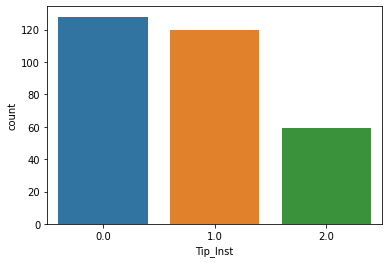

In [ ]:
#Gráfica variable categórica Tipo de Inst
sns.countplot("Tip_Inst",data=df)

In [ ]:
df.describe()

,Hor_Est,Nota_Eval,Tip_Inst,Horario
count,307.000000,307.000000,307.000000,307.000000
mean,2.826710,2.593750,0.775244,0.824104
std,1.061355,1.140918,0.748619,0.381353
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,1.000000
50%,3.000000,2.700000,1.000000,1.000000
75%,3.500000,3.500000,1.000000,1.000000
max,5.000000,5.000000,2.000000,1.000000


In [ ]:
#Visualización de datos por tipos de Institución con la función groupby
print(df.groupby('Tip_Inst').size())

Tip_Inst
0.0    128
1.0    120
2.0     59
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


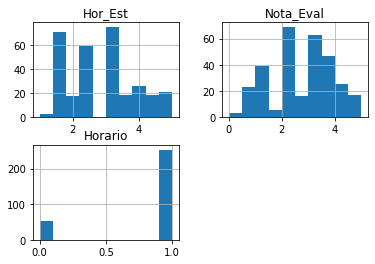

In [ ]:
#Visualización de los Features: Horas de estudio, Nota Evaluativa, Horario
df.drop(['Tip_Inst'],1).hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


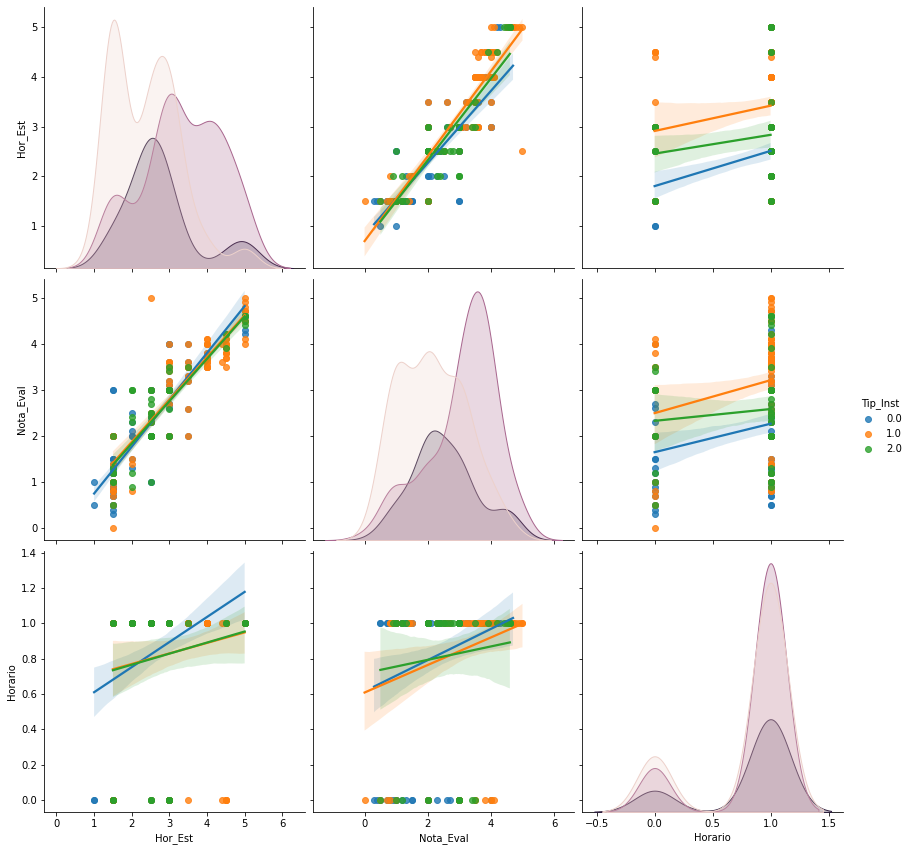

In [ ]:
#Gráfics de distribución para observar como se concentran los features 
sns.pairplot(df.dropna(), hue='Tip_Inst',size=4,vars=["Hor_Est", "Nota_Eval", "Horario"],kind='reg')

In [ ]:
#Creación del modelo de regresión
X = np.array(df.drop(['Tip_Inst'],1))
y = np.array(df['Tip_Inst'])
X.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


(307, 3)

In [ ]:
#Ajuste del modelo
model = linear_model.LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [ ]:
#Confirmar que tan aceptable o bueno es el modelo
model.score(X,y)

0.5700325732899023

In [ ]:
#Validación del modelo con el test de entreanamiento y de prueba del 80%
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [ ]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=None)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.576000 (0.121856)


In [ ]:
# Ahora se hacen las predicciones del modelo
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.5645161290322581


In [ ]:
print(confusion_matrix(Y_validation, predictions))

[[14  5  0]
 [10 21  0]
 [ 6  6  0]]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(Y_validation, predictions)

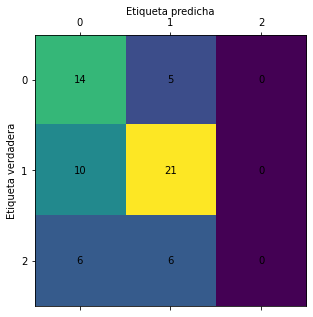

In [ ]:
fig, ax=plt.subplots(figsize=(10,5))
ax.matshow(cm)
plt.title('Matriz de confusión', fontsize=10)
plt.ylabel('Etiqueta verdadera', fontsize=10)
plt.title('Etiqueta predicha', fontsize=10)
for (i, j), z in np.ndenumerate(cm):
  ax.text(j, i, '{:0.0f}'. format(z), ha='center', va='center')

In [ ]:
#Ajuste del modelo
model = linear_model.LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [ ]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

         0.0       0.47      0.74      0.57        19
         1.0       0.66      0.68      0.67        31
         2.0       0.00      0.00      0.00        12

    accuracy                           0.56        62
   macro avg       0.37      0.47      0.41        62
weighted avg       0.47      0.56      0.51        62



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X_new = pd.DataFrame({'Nota_Eval': [3], 'Hor_Est': [5], 'Horario': [1]})
model.predict(X_new)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([1.])

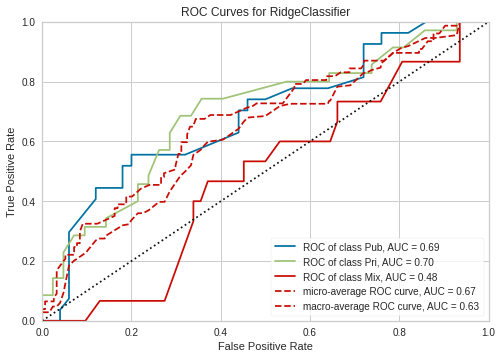

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_game


# Encode the non-numeric columns
X = OrdinalEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)

# Create the train and test data
X_train, X_validation, Y_train,Y_validation = train_test_split(X, y, random_state=42)

# Instaniate the classification model and visualizer
model = RidgeClassifier()
visualizer = ROCAUC(model, classes=["Pub", "Pri", "Mix"])

visualizer.fit(X_train, Y_train)        # Fit the training data to the visualizer
visualizer.score(X_validation, Y_validation)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure